In [1]:
#This notebook has all of the code used to create female participation vs. medal wins graph--2008

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from scipy import stats

In [2]:
allath_df = pd.read_csv("Resources/kaggle_allathlete_olympics.csv")
allath_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
summer_df = allath_df.loc[allath_df["Season"]=="Summer"]
exclude_2016 = summer_df.loc[summer_df["Year"] < 2015]
exclude_2016.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN


In [4]:
#Total athletes who participated per country, ALL TIME
total_df = exclude_2016.groupby(["NOC"])
total_df2 = pd.DataFrame(total_df["Name"].count())
total_df3 = total_df2.reset_index()
tot_athlete_df = total_df3.rename(columns={"NOC":"Country", "Name": "Total Number of Athletes"})
tot_athlete_df.head()

,Country,Total Number of Athletes
0,AFG,123
1,AHO,74
2,ALB,57
3,ALG,465
4,AND,49


In [9]:
#WOMEN STUFF
#Per year, get total athletes per country, total medals per countr, total women per country, total women wins, 
#total males per country, total male wins 

women_df= exclude_2016.loc[exclude_2016["Sex"]=="F"]
women_2012 = women_df.loc[women_df["Year"]==2012]

#all athletes
country_group = women_2012.groupby(["NOC"])
all_women_df = pd.DataFrame(country_group["Name"].count())
all_women_df = all_women_df.reset_index()
all_women_df = all_women_df.rename(columns={"Name":"Total Number of Women"})


#all medals
all_medals_df = pd.DataFrame(country_group["Medal"].count())
all_medals_df = all_medals_df.reset_index()
all_medals_df = all_medals_df.rename(columns={"Medal":"Total Medals_by Women"})

#gold medals
gold_medals = women_2012.loc[women_2012["Medal"] == "Gold"]
country_group3 = gold_medals.groupby(["NOC"])
gold_medals_df = pd.DataFrame(country_group3["Medal"].count())
gold_medals_df = gold_medals_df.reset_index()
gold_medals_df = gold_medals_df.rename(columns={"Medal":"Gold Medals_Women"})

#silver medals
silver_medals = women_2012.loc[women_2012["Medal"] == "Silver"]
country_group4 = silver_medals.groupby(["NOC"])
silver_medals_df = pd.DataFrame(country_group4["Medal"].count())
silver_medals_df = silver_medals_df.reset_index()
silver_medals_df = silver_medals_df.rename(columns={"Medal":"Silver Medals_Women"})


#bronze medals
bronze_medals = women_2012.loc[women_2012["Medal"] == "Bronze"]
country_group5 = bronze_medals.groupby(["NOC"])
bronze_medals_df = pd.DataFrame(country_group5["Medal"].count())
bronze_medals_df = bronze_medals_df.reset_index()
bronze_medals_df = bronze_medals_df.rename(columns={"Medal":"Bronze Medals_Women"})



#merge all dataframes to make a table
merged_df1 = pd.merge(all_women_df, all_medals_df, on='NOC', how='outer')
merged_df2 = pd.merge(merged_df1, gold_medals_df, on="NOC", how = "outer")
merged_df3 = pd.merge(merged_df2, silver_medals_df, on="NOC", how = "outer")
women_2012_merged_df = pd.merge(merged_df3, bronze_medals_df, on="NOC", how = "outer")
women_2012_merged_df.head()

,NOC,Total Number of Women,Total Medals_by Women,Gold Medals_Women,Silver Medals_Women,Bronze Medals_Women
0,AFG,1,0,NaN,NaN,NaN
1,ALB,3,0,NaN,NaN,NaN
2,ALG,17,0,NaN,NaN,NaN
3,AND,2,0,NaN,NaN,NaN
4,ANG,29,0,NaN,NaN,NaN


In [10]:
#MEN STUFF
men_df= exclude_2016.loc[exclude_2016["Sex"]=="M"]
men_2012 = men_df.loc[men_df["Year"]==2012]

#all athletes
country_group_men = men_2012.groupby(["NOC"])
all_men_df = pd.DataFrame(country_group_men["Name"].count())
all_men_df = all_men_df.reset_index()
all_men_df = all_men_df.rename(columns={"Name":"Total Number of Men"})


#all medals
all_medals_df = pd.DataFrame(country_group_men["Medal"].count())
all_medals_df = all_medals_df.reset_index()
all_medals_df = all_medals_df.rename(columns={"Medal":"Total Medals_by Men"})

#gold medals
gold_medals = men_2012.loc[men_2012["Medal"] == "Gold"]
country_group2 = gold_medals.groupby(["NOC"])
gold_medals_df = pd.DataFrame(country_group2["Medal"].count())
gold_medals_df = gold_medals_df.reset_index()
gold_medals_df = gold_medals_df.rename(columns={"Medal":"Gold Medals_Men"})

#silver medals
silver_medals = men_2012.loc[men_2012["Medal"] == "Gold"]
country_group4 = silver_medals.groupby(["NOC"])
silver_medals_df = pd.DataFrame(country_group4["Medal"].count())
silver_medals_df = silver_medals_df.reset_index()
silver_medals_df = silver_medals_df.rename(columns={"Medal":"Silver Medals_Men"})


#bronze medals
bronze_medals = men_2012.loc[men_2012["Medal"] == "Bronze"]
country_group5 = bronze_medals.groupby(["NOC"])
bronze_medals_df = pd.DataFrame(country_group5["Medal"].count())
bronze_medals_df = bronze_medals_df.reset_index()
bronze_medals_df = bronze_medals_df.rename(columns={"Medal":"Bronze Medals_Men"})



#merge all dataframes to make a table
merged_df1 = pd.merge(all_men_df, all_medals_df, on='NOC', how='outer')
merged_df2 = pd.merge(merged_df1, gold_medals_df, on="NOC", how = "outer")
merged_df3 = pd.merge(merged_df2, silver_medals_df, on="NOC", how = "outer")
men_2012_merged_df = pd.merge(merged_df3, bronze_medals_df, on="NOC", how = "outer")
men_2012_merged_df.head()

,NOC,Total Number of Men,Total Medals_by Men,Gold Medals_Men,Silver Medals_Men,Bronze Medals_Men
0,AFG,5,1,NaN,NaN,1.0
1,ALB,7,0,NaN,NaN,NaN
2,ALG,22,1,1.0,1.0,NaN
3,AND,4,0,NaN,NaN,NaN
4,ANG,6,0,NaN,NaN,NaN


In [11]:
#Descriptive sums 
#total athletes (men + women)
everyone_2012= exclude_2016.loc[exclude_2016["Year"]==2012]
everyone_group = everyone_2012.groupby(["NOC"])
everyone_df = pd.DataFrame(everyone_group["Name"].count())
everyone_df = everyone_df.reset_index()
everyone_df = everyone_df.rename(columns={"Name":"Total Number Athletes"})
everyone_df.head()

,NOC,Total Number Athletes
0,AFG,6
1,ALB,10
2,ALG,39
3,AND,6
4,ANG,35


In [12]:
#merge men and women together
gender_2012_df = pd.merge(women_2012_merged_df, men_2012_merged_df, on="NOC", how="outer")
gender_2012_df2=pd.merge(gender_2012_df, everyone_df, on="NOC", how="outer")
gender_2012_df2.head()

,NOC,Total Number of Women,Total Medals_by Women,Gold Medals_Women,Silver Medals_Women,Bronze Medals_Women,Total Number of Men,Total Medals_by Men,Gold Medals_Men,Silver Medals_Men,Bronze Medals_Men,Total Number Athletes
0,AFG,1.0,0.0,NaN,NaN,NaN,5.0,1.0,NaN,NaN,1.0,6
1,ALB,3.0,0.0,NaN,NaN,NaN,7.0,0.0,NaN,NaN,NaN,10
2,ALG,17.0,0.0,NaN,NaN,NaN,22.0,1.0,1.0,1.0,NaN,39
3,AND,2.0,0.0,NaN,NaN,NaN,4.0,0.0,NaN,NaN,NaN,6
4,ANG,29.0,0.0,NaN,NaN,NaN,6.0,0.0,NaN,NaN,NaN,35


In [13]:
#female participation
country_2012_list = np.array(gender_2012_df2["NOC"])

total_women_list = np.array(gender_2012_df2["Total Number of Women"])
total_athletes_list = np.array(gender_2012_df2["Total Number Athletes"])

percent_women_list = total_women_list/total_athletes_list*100

women_partic_2012 = {"Country":country_2012_list,
                           "% Female Participation in 2012" : percent_women_list}

women_partic_2012_2 = pd.DataFrame(women_partic_2012)
women_partic_2012_2.head()

,Country,% Female Participation in 2012
0,AFG,16.666667
1,ALB,30.000000
2,ALG,43.589744
3,AND,33.333333
4,ANG,82.857143


In [14]:
#total % wins 
country_2012_list = np.array(gender_2012_df2["NOC"])

medal_women_list = np.array(gender_2012_df2["Total Medals_by Women"])
medal_men_list = np.array(gender_2012_df2["Total Medals_by Men"])
total_wins_list = medal_women_list + medal_men_list

total_athletes_list = np.array(gender_2012_df2["Total Number Athletes"])

percent_wins_list = total_wins_list/total_athletes_list*100

percent_wins_2012 = {"Country":country_2012_list,
                           "% Wins in 2012" : percent_wins_list}

percent_wins_2012_2= pd.DataFrame(percent_wins_2012)
percent_wins_2012_2.head()

,Country,% Wins in 2012
0,AFG,16.666667
1,ALB,0.000000
2,ALG,2.564103
3,AND,0.000000
4,ANG,0.000000


In [15]:
female_effect_2012_df = pd.merge(women_partic_2012_2, percent_wins_2012_2, on="Country", how="outer")
female_effect_exclude0 = female_effect_2012_df.loc[female_effect_2012_df["% Wins in 2012"] > 0]
female_effect_exclude0.head()

,Country,% Female Participation in 2012,% Wins in 2012
0,AFG,16.666667,16.666667
2,ALG,43.589744,2.564103
6,ARG,30.405405,12.837838
7,ARM,12.903226,9.677419
10,AUS,47.276265,22.178988


slope = 0.057491945122412895
p-value = 0.45792808675459784


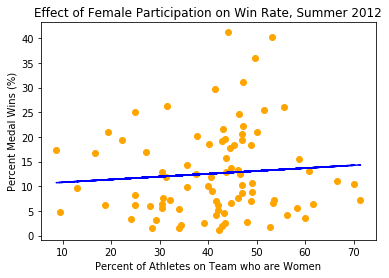

In [16]:
x_female = female_effect_exclude0["% Female Participation in 2012"]
y_wins = female_effect_exclude0["% Wins in 2012"]

plt.scatter(x_female, y_wins, color="orange")
plt.title("Effect of Female Participation on Win Rate, Summer 2012")
plt.ylabel("Percent Medal Wins (%)")
plt.xlabel("Percent of Athletes on Team who are Women")

#set up a regression line
(slope, intercept, _, _, _) = linregress(x_female, y_wins)
fit = slope * x_female + intercept
plt.plot(x_female, fit, 'b--')
slope, intercept, r_value, p_value, std_err = stats.linregress(x_female,y_wins)

print(f"slope = {slope}")
print(f"p-value = {p_value}")